# New method using feature matching

## Imports

In [14]:
from __future__ import print_function
import cv2
import numpy as np
import argparse
from math import sqrt
import matplotlib.pyplot as plt
from PIL import Image
import glob
from tqdm import tqdm
import os
from scipy.spatial import ConvexHull, convex_hull_plot_2d

print("Done")

Done


In [15]:
def get_centroid(vertices):
    x = [vertex[0] for vertex in vertices]
    y = [vertex[1] for vertex in vertices]
    return (sum(x)/len(vertices), sum(y)/len(vertices))


def return_focus_target_window(image): #img2
    img2 = np.array(cv2.imread(image,cv2.IMREAD_GRAYSCALE)) # trainImage
    
    # Initiate SIFT detector
    sift = cv2.SIFT_create()
    
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
    # BFMatcher with default params
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    
    # Apply ratio test
    good = []
    thresh = 0.4
    for m,n in matches:
        if m.distance < thresh*n.distance:
            good.append([m])
            
    # cv2.drawMatchesKnn expects list of lists as matches.
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    points = [i[0] for i in np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)]
    while True:
        if len(points) <= 10:
            thresh = thresh + 0.01
            # Apply ratio test
            good = []
            for m,n in matches:
                if m.distance < thresh*n.distance:
                    good.append([m])

            # cv2.drawMatchesKnn expects list of lists as matches.
            img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
            points = [i[0] for i in np.float32([kp2[m[0].trainIdx].pt for m in good]).reshape(-1,1,2)]
        else:
            break
    plt.figure(figsize = (20,20))
    plt.imshow(img3),plt.show()
    print(len(points))
    hull = ConvexHull([(i[0], i[1]) for i in points])
    hull_vertices = []
    for i in range(len(hull.vertices)):
        hull_vertices.append((points[hull.vertices[i]][0], points[hull.vertices[i]][1]))

    centroid = get_centroid(points)
    # plt.plot([i[0] for i in points], [j[1] for j in points], 'o', c='grey', markersize=2)
    # plt.plot([vertex[0] for vertex in hull_vertices], [vertex[1] for vertex in hull_vertices], 'r--', lw = 2)
    # plt.plot([vertex[0] for vertex in hull_vertices], [vertex[1] for vertex in hull_vertices], 'ro', markersize = 2)
    # plt.plot(centroid[0], centroid[1], 'go', markersize = 5)

    return [centroid[0] - np.shape(img2)[1]/24, centroid[1] - np.shape(img2)[0]/24, np.shape(img2)[1]/12, np.shape(img2)[0]/12]

print("Done")

Done


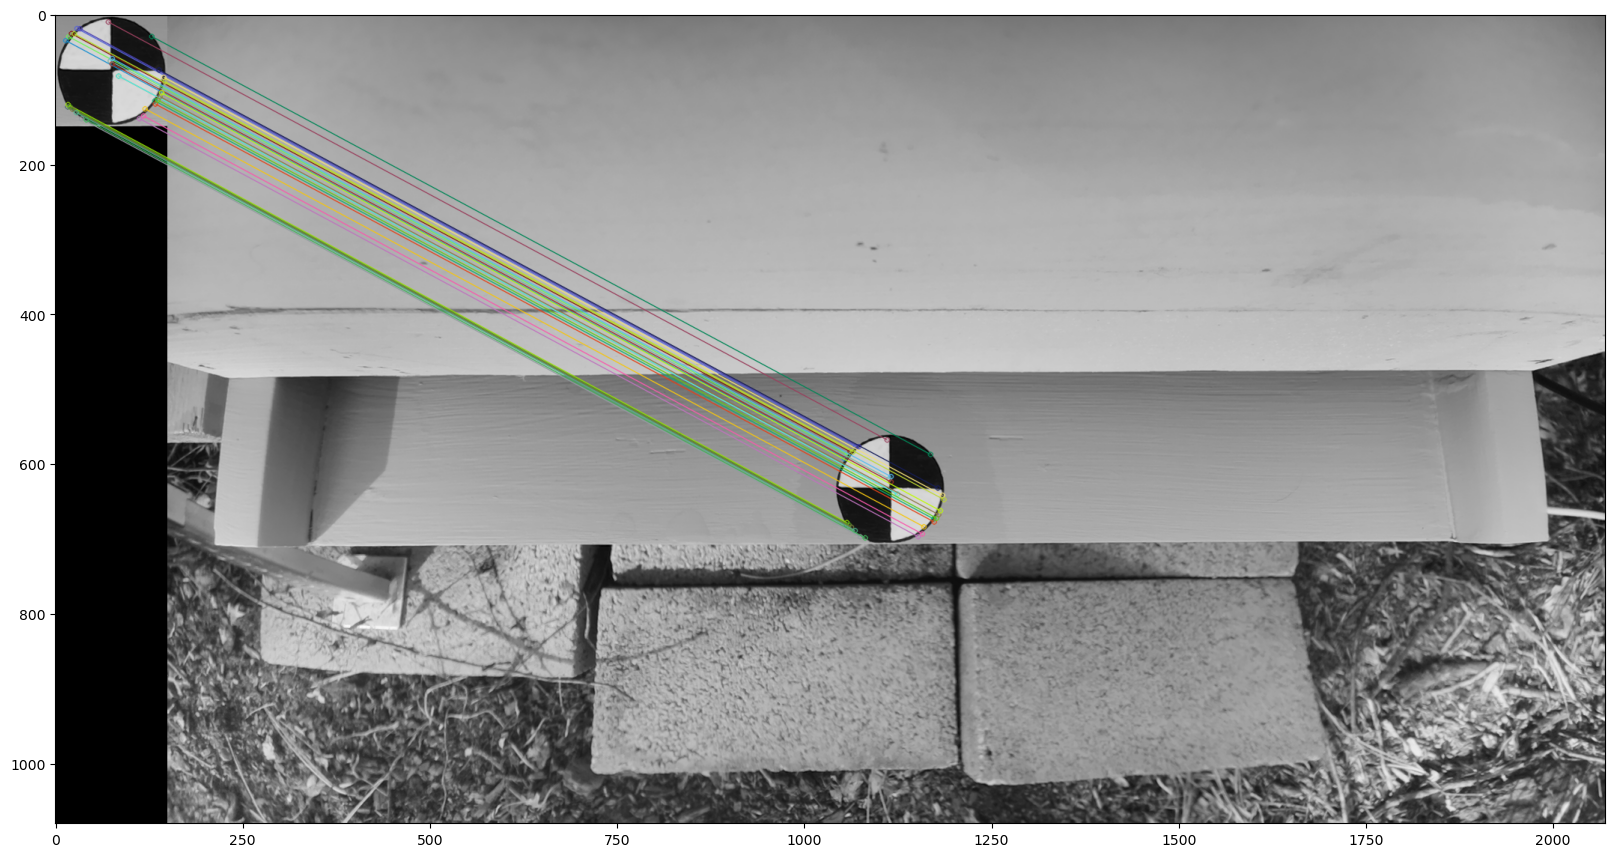

31
[886.794421780494, 598.9842352098034, 160.0, 90.0]


In [16]:
reference = cv2.cvtColor(cv2.imread('focus_target.png'), cv2.COLOR_BGR2GRAY) # queryImage
source_imgs = glob.glob('Pi Images/*')
img1 = np.array(reference)
windows = []

# for image in source_imgs:
#     windows.append(return_focus_target_window(image))

windows = return_focus_target_window(source_imgs[-1])
    
print(windows)

NameError: name 'points' is not defined